# Lets figure out how efficent is this algorithm:

# $ \eta = N(\alpha_0) / N_{SignificantDigitsInVector} $

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from helperFunctions import *


# Create Data

amount of numbers in y = 50


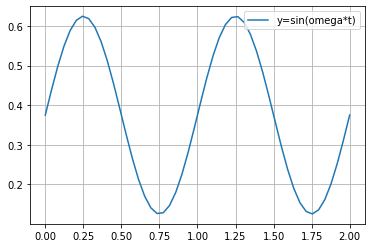

In [2]:
T=1 #[s]
omega=2*np.pi/T
k=2

t = np.linspace(0, k*T, k*25)
y = np.sin(omega*t)
y = (y + 1.5)/4

print('amount of numbers in y = {}'.format(len(y)))

ax = plt.axes()
line, = ax.plot(t,y)
line.set_label('y=sin(omega*t)')
ax.grid(); ax.legend()

# Find $ \alpha_0 $

In [3]:
fmap=map(decimalToBinary, y) #tau chosen to be 12
binaryInitial = ''.join(map(decimalToBinary, y))

necessaryPrecision = len(binaryInitial)
mp.prec = necessaryPrecision 

decimalInitial = binaryToDecimal(binaryInitial)
print('decimalInitial = %s\n' % decimalInitial)
print('number of decimal digits = %d' % len(str(decimalInitial)))

decimalInitial = 0.375107020002163653675740609313832531010832082831024254550327233328017826313224694008300547841445274675543479379087172241761141051553380366724121541714114356423529781329947701413107

number of decimal digits = 182


# Accuracy of the Algoritm is Promised to be $ 1/2^\tau $ given the 182 digits of $ \alpha_0 $

In [4]:
p_algo = 1/(2**tau)
print('p_algo = {}'.format(p_algo))

p_algo = 0.000244140625


# Achieving the same Accuracy in the "regular" decimal way, we would need to keep $ ceil(log_{10} (2^\tau)) $ digits

In [5]:
N_sig = m.ceil(np.log10(2**tau))
print('N_significant  = {}'.format(N_sig))
p_sig = 1 / 10 ** N_sig
print('p_sig = {}'.format(p_sig))

N_significant  = 4
p_sig = 0.0001


# Amount of digits for 50 numbers storing the significant numbers only

In [6]:
print(len(y) * N_sig)

200


# Compression Effiency $ \eta $:

In [7]:
eta = len(str(decimalInitial))/(len(y) * N_sig)
print('eta = {}'.format(eta))

eta = 0.91


# Well this is not very exiting... lets run on different \tau values

effiency for tau = 100: 0.12133333333333333
1/2^100 = 7.888609052210118e-31


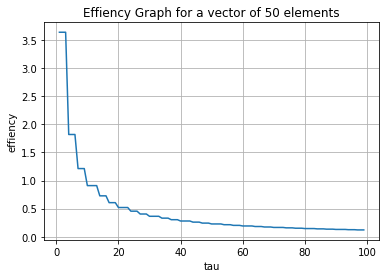

In [11]:
tau = range(100) [1:] 
N_sig = []
N_alpha = []
for ii in range(len(tau)):
    fmap=map(decimalToBinary, y)
    binaryInitial = ''.join(map(decimalToBinary, y))
    necessaryPrecision = len(binaryInitial)
    mp.prec = necessaryPrecision 
    decimalInitial = binaryToDecimal(binaryInitial)
    N_alpha.append(len(str(decimalInitial)))
    
    N_sig.append(m.ceil(np.log10(float(2**tau[ii]))))

N_sig = np.array(N_sig)
N_alpha = np.array(N_alpha)
eff = N_alpha/(N_sig*len(y))


plt.plot(tau,eff)
plt.grid ('on')
plt.xlabel('tau')
plt.ylabel('effiency')
plt.title('Effiency Graph for a vector of {} elements'.format(len(y)))
print('effiency for tau = 100: {}'.format(eff[-1]))
print ('1/2^100 = {}'.format(1/2**100))